# (Ford Gobike Data Exploration)
## by (Ali Hassan Sobh)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area..

In [57]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [58]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [59]:
print(df.shape)

(183412, 16)


In [60]:
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [61]:
print(df.info)

<bound method DataFrame.info of         duration_sec                start_time                  end_time  \
0              52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1              42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2              61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3              36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4               1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
...              ...                       ...                       ...   
183407           480  2019-02-01 00:04:49.7240  2019-02-01 00:12:50.0340   
183408           313  2019-02-01 00:05:34.7440  2019-02-01 00:10:48.5020   
183409           141  2019-02-01 00:06:05.5490  2019-02-01 00:08:27.2200   
183410           139  2019-02-01 00:05:34.3600  2019-02-01 00:07:54.2870   
183411           271  2019-02-01 00:00:20.6360  2019-02-01 00:04:52.0580   

        start_station_id                               

In [62]:
#Convert the data type for start time and end time to be datetime64
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [63]:
#Check is there Null Variables ? 
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [64]:
# Remove Nulls from Member_gender Column
df2 = df[df['member_gender'].isnull() == False]

In [65]:
df2['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [66]:
df2['user_type'].value_counts()

Subscriber    158516
Customer       16631
Name: user_type, dtype: int64

In [67]:
#Check Duplicated 
df2.duplicated().sum()


0

In [68]:
# get member_age from member_birth_year.
df2['member_age'] = 2020 - df2['member_birth_year']
df2['member_age'] = df2['member_age'].astype(int)


<ipython-input-68-04d7a37c2f83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['member_age'] = 2020 - df2['member_birth_year']
<ipython-input-68-04d7a37c2f83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['member_age'] = df2['member_age'].astype(int)


### What is the structure of your dataset?
> There are 183,412 data journeys for fordgobike in the dataset with 16 features 
> (183412, 16)


### What is/are the main feature(s) of interest in your dataset?

>  trip duration 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time , member_gender , member_birth will get age from it , user_type 

## Univariate Exploration

> will explore the Main Feautre with is Duration time 

Text(0, 0.5, 'Number of Trips')

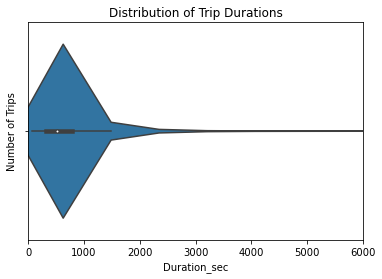

In [69]:

sb.violinplot(data = df2, x = 'duration_sec');
plt.xlim([0, 6000]);
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')


> it looks like that Trip duration is mostly centered on values which are less than 1000 seconds .

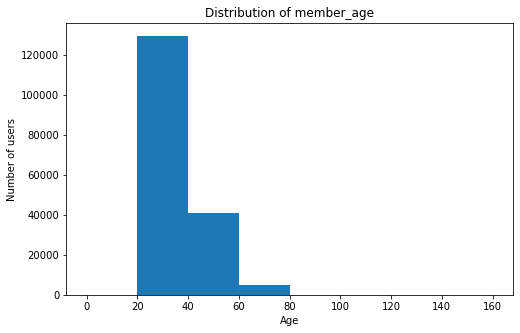

In [70]:
binsize = 20
bins = np.arange(0, df2['member_age'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df2, x = 'member_age', bins = bins)
plt.title('Distribution of member_age')
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.show()

> it looks like most bikers thier ageis between 20 and 40 

In [71]:
#get Hour Time when trip Start 
df2['startTimehr']= df2['start_time'].dt.hour

<ipython-input-71-bcd434efce1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['startTimehr']= df2['start_time'].dt.hour


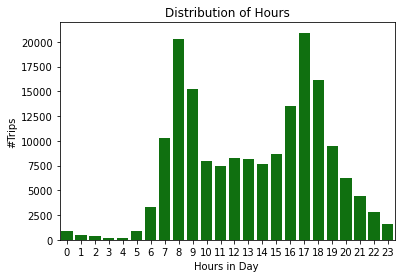

In [91]:

sb.countplot(data = df2, x = 'startTimehr' , color='green');
plt.title('Distribution of Hours')
plt.xlabel('Hours in Day ')
plt.ylabel('#Trips');


> it's looks like most biker start riding from 8 Am and 5 PM in day

In [73]:
#get Day from Start time 
df2['dayofweekStarted']= df2['start_time'].dt.strftime('%a')


<ipython-input-73-eb0c6f3a6790>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dayofweekStarted']= df2['start_time'].dt.strftime('%a')


In [74]:
#making week days in its natural sequence 
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df2['dayofweekStarted'] = df2['dayofweekStarted'].astype(ordered_weekdays)

<ipython-input-74-2d533e8964fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dayofweekStarted'] = df2['dayofweekStarted'].astype(ordered_weekdays)


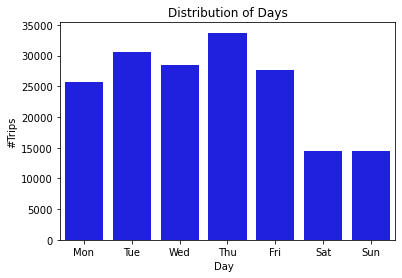

In [87]:
sb.countplot(data = df2, x = 'dayofweekStarted' , color = 'Blue');
plt.title('Distribution of Days')
plt.xlabel('Day  ')
plt.ylabel('#Trips');


> it looks Tuesday and thursday has most bikers in these two days than other days in weeks 

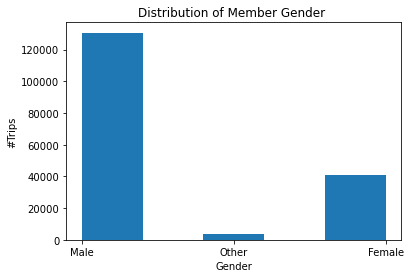

In [76]:
plt.hist(data = df2, x = 'member_gender', bins = 5);
plt.title('Distribution of Member Gender ')
plt.xlabel('Gender')
plt.ylabel('#Trips');

> most Bikers are Males 

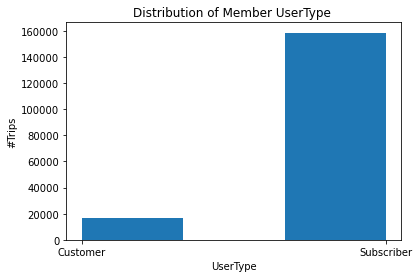

In [77]:
plt.hist(data = df2, x = 'user_type', bins = 3);
plt.title('Distribution of Member UserType ')
plt.xlabel('UserType')
plt.ylabel('#Trips');

>it looks like that Subscriber is more than Customer 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> yes . duration_sec was has long tail so i do a log scale 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

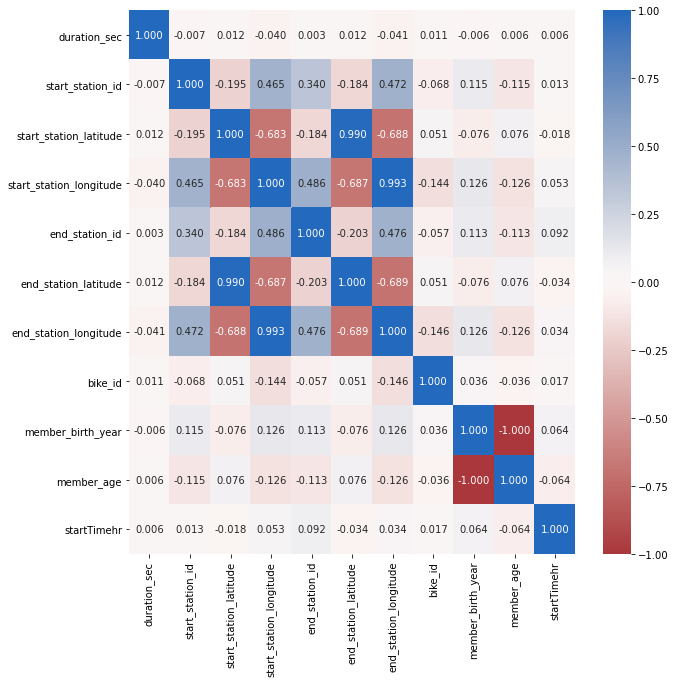

In [78]:
plt.figure(figsize = [10, 10])
sb.heatmap(df2.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);


> there could be correlations between the subsequent pairs of variables: (start_station_id, end_station_id), (start_station_latitude, start_station_longitude), and (end_station_latitude, end_station_longitude).

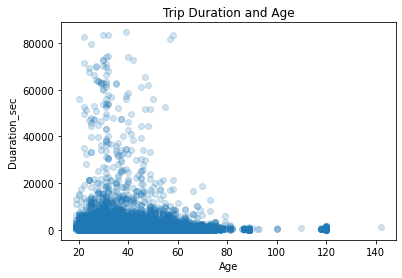

In [79]:
sb.regplot(x = "member_age", y="duration_sec", data=df2, fit_reg = False, scatter_kws={"alpha": 0.2})
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duaration_sec');

> it looks like  ages between 20 and 60 is more to take more time than older people 

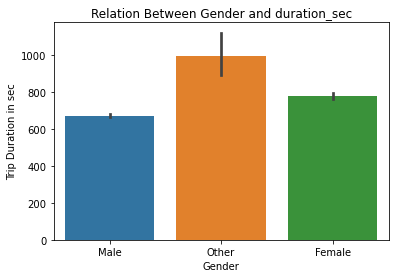

In [80]:
sb.barplot(data=df2, x='member_gender', y='duration_sec');
plt.title('Relation Between Gender and duration_sec')
plt.xlabel('Gender');
plt.ylabel('Trip Duration in sec');

> it looks like it's there isn't too much diffrence bteween male and female . male looks to be little than females in trips 

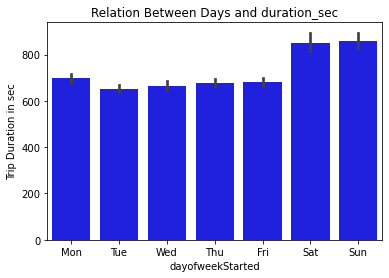

In [88]:
sb.barplot(data=df2, x='dayofweekStarted', y='duration_sec' , color = 'Blue');
plt.title('Relation Between Days and duration_sec')
plt.xlabel('dayofweekStarted');
plt.ylabel('Trip Duration in sec');

> the sunday and saturday has much higer trips ridding compare to other days  

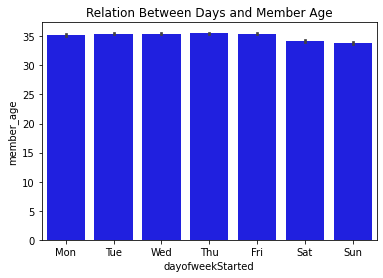

In [89]:
sb.barplot(data=df2, x='dayofweekStarted', y='member_age',color = 'Blue');
plt.title('Relation Between Days and Member Age')
plt.xlabel('dayofweekStarted');
plt.ylabel('member_age');

> there is no huge difference between riders ages with days when they rent bikes . but it's observed riders on saturday and sunday younger than other days 

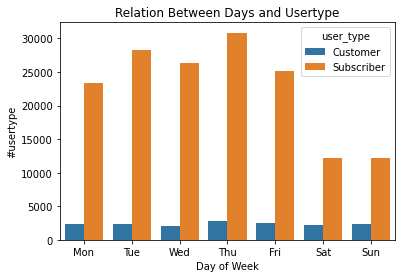

In [83]:
sb.countplot(data=df2, x='dayofweekStarted', hue='user_type');
plt.title('Relation Between Days and Usertype')
plt.xlabel('Day of Week');
plt.ylabel('#usertype');

> it looks like Subscriber has more usage than customer over all 

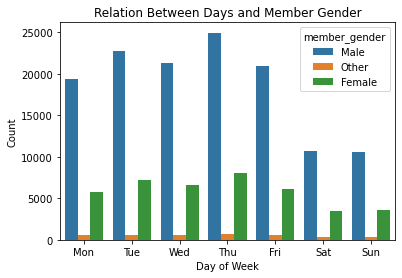

In [84]:
sb.countplot(data=df2, x='dayofweekStarted', hue='member_gender');
plt.title('Relation Between Days and Member Gender')
plt.xlabel('Day of Week');
plt.ylabel('Count');

> it looks like Male has more usage than female and other over all 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration is so dependendable on age .
> Trip Duration also has relationship with the day of week 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes i found day of week has relationship with age . it's observed riders on saturday and sunday younger than other days

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


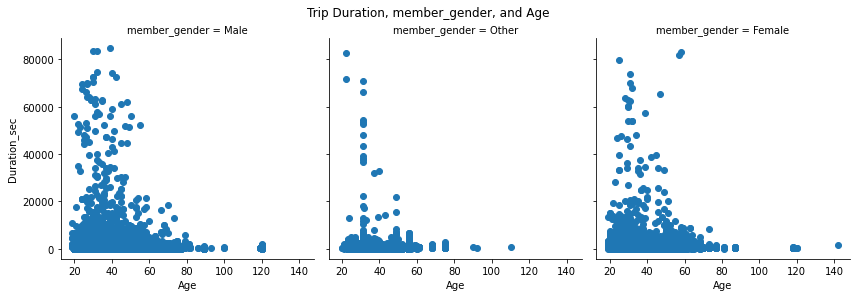

In [85]:
x= sb.FacetGrid(df2,col='member_gender',size = 4 , margin_titles=True )
x = x.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1  )
x.fig.suptitle('Trip Duration, member_gender, and Age' , verticalalignment = 'bottom')
x.set_xlabels('Age')
x.set_ylabels('Duration_sec')
plt.show();

>  it's look like trip duration for Male and other more than males . and ages trend tends to be same at the three gender 

> 

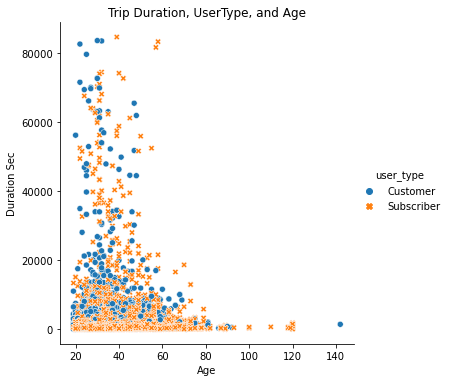

In [86]:
sb.relplot(x ="member_age", y ="duration_sec",
            hue ="user_type", style ="user_type", 
            data = df2);
plt.title('Trip Duration, UserType, and Age');
plt.xlabel('Age');
plt.ylabel('Duration Sec');

>it looks like that both subscriber and customer has the same trend in the age but it's observed that subscribers the trip duration is higher than customer for older age .


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> subscribers the trip duration is higher than customer for older age .
> female has higer trip duration than male although male more than females 
### Were there any interesting or surprising interactions between features?

> riders on saturday and sunday younger than other days

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!